In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from itertools import product
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from geopy.geocoders import Nominatim

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/clustering_challenge.csv')

In [ ]:
df

In [ ]:
categorical_data = df.select_dtypes(include='object')
categorical_data

In [ ]:
df.nunique()

In [ ]:
df.info()

In [ ]:
df.groupby('satisfaction').count()

In [ ]:
df.groupby('pays').count()

In [ ]:
df.groupby('produit').count()

Selon ce qu'on a pu remarquer, ce sont les colonnes 'produit', 'pays' et 'satisfaction' qui posent problème en terme de cohérence des données. Nous allons les traiter les 3

In [ ]:
def get_country(latitude, longitude):
    geolocator = Nominatim(user_agent="my-app")  # Instantiate a geolocator object
    location = geolocator.reverse((latitude, longitude), exactly_one=True)  # Reverse geocode the coordinates
    if location is not None and 'address' in location.raw and 'country' in location.raw['address']:
        country = location.raw['address']['country']  # Extract the country from the location data
        return country
    else:
        return None

In [ ]:
df[df['pays'].isnull()]

id  id_client        date  magasin        lat       lng produit  \
2908   9531       1914  2023-03-30       39  35.531919  6.188901       /   
3063  10752       1886  2023-03-22       39  35.531919  6.188901       /   

      quantite pays satisfaction  
2908        19  NaN            '  
3063         4  NaN            '

In [ ]:
filtered_df = df.loc[(df['pays'] == '2') | (df['pays'] == '3') | (df['pays'] == '4') | (df['pays'] == '5') | (df['pays'] == 'E')]
filtered_df['pays'] = filtered_df.apply(lambda row: get_country(row['lat'], row['lng']), axis=1)

In [ ]:
filtered_df

In [ ]:
rest_df = df.loc[~(df['pays'] == '2') & ~(df['pays'] == '3') & ~(df['pays'] == '4') & ~(df['pays'] == '5') & ~(df['pays'] == 'E')]
rest_df

In [ ]:
result_df = pd.concat([rest_df, filtered_df])

In [ ]:
result_df.info()

In [ ]:
result_df = result_df[result_df['satisfaction'] != "'"]
result_df = result_df[result_df['satisfaction'] != "("]
result_df = result_df[result_df['satisfaction'] != "H()"]
result_df = result_df[result_df['satisfaction'] != "JF"]

In [ ]:
result_df.info()

In [ ]:
result_df['pays'] = result_df['pays'].replace('Algeria', 'DZ')

In [ ]:
result_df.groupby('pays').count()

In [ ]:
result_df.groupby('satisfaction').count()

In [ ]:
result_df

In [ ]:
result_df = result_df.sort_values('satisfaction')

In [ ]:
result_df

In [ ]:
result_df = result_df[result_df['id'] != 5637]
result_df = result_df[result_df['id'] != 704]
result_df = result_df[result_df['id'] != 12328]
result_df = result_df[result_df['id'] != 10600]
result_df = result_df[result_df['id'] != 4792]
result_df = result_df[result_df['id'] != 1541]

In [ ]:
result_df.info()

In [ ]:
result_df[result_df['lat'].isnull()]

id  id_client        date  magasin  lat  lng produit  quantite pays  \
2476   8320       4787  2023-04-13      104  NaN  NaN  Burger        15   DZ   
3074  14535       4986  2023-04-08      106  NaN  NaN  Crêpe         19   DZ   

     satisfaction  
2476            2  
3074            5

In [ ]:
result_df[result_df['lng'].isnull()]

id  id_client        date  magasin  lat  lng produit  quantite pays  \
2476   8320       4787  2023-04-13      104  NaN  NaN  Burger        15   DZ   
3074  14535       4986  2023-04-08      106  NaN  NaN  Crêpe         19   DZ   

     satisfaction  
2476            2  
3074            5

In [ ]:
result_df = result_df[result_df['id'] != 8320]
result_df = result_df[result_df['id'] != 14535]

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3260 entries, 2318 to 1466
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3260 non-null   int64  
 1   id_client     3260 non-null   int64  
 2   date          3260 non-null   object 
 3   magasin       3260 non-null   int64  
 4   lat           3260 non-null   float64
 5   lng           3260 non-null   float64
 6   produit       3260 non-null   object 
 7   quantite      3260 non-null   int64  
 8   pays          3260 non-null   object 
 9   satisfaction  3260 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 280.2+ KB


In [ ]:
result_df.groupby('produit').count()

id  id_client  date  magasin  lat  lng  quantite  pays  \
produit                                                             
#21         1          1     1        1    1    1         1     1   
(D-E E      3          3     3        3    3    3         3     3   
-3'! (      1          1     1        1    1    1         1     1   
1/2 Po      4          4     4        4    4    4         4     4   
10 pié      5          5     5        5    5    5         5     5   
12 pié      5          5     5        5    5    5         5     5   
2 Boul      1          1     1        1    1    1         1     1   
2AJ7J       6          6     6        6    6    6         6     6   
3 From      1          1     1        1    1    1         1     1   
3D7) E      2          2     2        2    2    2         2     2   
4 From      1          1     1        1    1    1         1     1   
4 from     16         16    16       16   16   16        16    16   
4 sais      1          1     1        1    1    1         1     1   
4.4H.)     17         17    17       17   17   17        17    17   
54 pié      1          1     1        1    1    1         1     1   
79'E (      2          2     2        2    2    2         2     2   
8 piéc     10         10    10       10   10   10        10    10   
A chev      1          1     1        1    1    1         1     1   
AIN IF      4          4     4        4    4    4         4     4   
Adas        2          2     2        2    2    2         2     2   
Alaska      2          2     2        2    2    2         2     2   
Americ     15         15    15       15   15   15        15    15   
Apple       1          1     1        1    1    1         1     1   
Aranci      1          1     1        1    1    1         1     1   
Arayes      1          1     1        1    1    1         1     1   
Arizon      1          1     1        1    1    1         1     1   
Au Mor      1          1     1        1    1    1         1     1   
Au Tho      1          1     1        1    1    1         1     1   
Auberg      3          3     3        3    3    3         3     3   
BBQ bu      1          1     1        1    1    1         1     1   
BBQ do      1          1     1        1    1    1         1     1   
BISCUI      1          1     1        1    1    1         1     1   
BONBON      1          1     1        1    1    1         1     1   
BOX 24      2          2     2        2    2    2         2     2   
BOX IC      1          1     1        1    1    1         1     1   
Baba G      2          2     2        2    2    2         2     2   
Baba à      1          1     1        1    1    1         1     1   
Bakery      5          5     5        5    5    5         5     5   
Baklaw      1          1     1        1    1    1         1     1   
Barque      2          2     2        2    2    2         2     2   
Baston      1          1     1        1    1    1         1     1   
Becon       1          1     1        1    1    1         1     1   
Beef        6          6     6        6    6    6         6     6   
Beef &      2          2     2        2    2    2         2     2   
Beef d      4          4     4        4    4    4         4     4   
Beef g     14         14    14       14   14   14        14    14   
Bella       2          2     2        2    2    2         2     2   
Best O    141        141   141      141  141  141       141   141   
Big  Q      1          1     1        1    1    1         1     1   
Big Bu      5          5     5        5    5    5         5     5   
Big Ki      2          2     2        2    2    2         2     2   
Big Ma      7          7     7        7    7    7         7     7   
Big Ta      1          1     1        1    1    1         1     1   
Big bu      2          2     2        2    2    2         2     2   
Big ma      1          1     1        1    1    1         1     1   
Black       1          1     1        1    1    1         1     1   
Boca M   

In [ ]:
result_df

id  id_client        date  magasin        lat        lng   produit  \
2318  16076       8859  2021-03-17      174  36.734002   2.933980    Chakhc   
578    5038       8414  2023-02-19      167  35.701586  -0.560753    Margue   
3083   2510       3788  2023-05-05       75  36.730513   3.143422    Spaghe   
2608   2515       6803  2022-10-20      130  36.742526   3.040004    Americ   
302    6737       6563  2022-11-27      125  36.746967   3.042509    Double   
1444  15181       8625  2023-01-01      167  35.701586  -0.560753    Chicke   
299    1197       4406  2021-11-19       89  30.399385  -9.583659    Tomy B   
2611   2770       4255  2021-05-04       87  33.587843  -7.633625    MIRIND   
1453   9410       2159  2021-02-02       44  36.755835   2.954852     Tacos   
1020   7982       7083  2022-10-05      134  34.017481  -6.834685    Menu D   
1019   8163       7258  2023-01-03      139  36.749377   3.039230    12 pié   
2324  10877       6820  2023-03-13      130  36.742526   3.040004    Classi   
1017  14163       4562  2022-06-08       95  33.597105  -7.641446    Saumon   
1462   9020       1351  2022-06-15       28  35.759465  -5.833954    Poulet   
289    4995       1338  2021-12-13       28  35.759465  -5.833954    Pain s   
588   13391       9742  2023-01-03      186  35.930731   0.089242    Shawar   
1477   5910       6402  2022-09-08      166  35.762863  -5.838305    Salade   
281    3949       9249  2022-06-30      185  33.898527  -5.532659    Pastic   
279   13873       6328  2022-09-02      123  36.754067   2.977845    Pizza    
1479  10930       7049  2022-09-19      134  34.017481  -6.834685    Best O   
1456  12726       5812  2022-07-14      116  36.764383   3.038958    Tacos    
573    5225       5902  2022-10-07      125  36.746967   3.042509    Burger   
571    4718       4156  2021-04-28       87  33.587843  -7.633625    SAYLEY   
2625   9314       6675  2023-04-01      126  35.758084  -5.801260    Comple   
2356   9782       5252  2021-03-03      110  36.762346   2.922589    Pizza    
1383  16329       1189  2022-11-10       22  35.704859  -0.572776    Pizza    
341   14932       6807  2023-05-28      130  36.742526   3.040004    Americ   
560   12638        627  2022-09-06       14  34.038637  -4.999724    Pizza    
2351   1319       4916  2023-03-02      105  33.564803  -7.601925    Family   
336   11132       6768  2023-03-31      130  36.742526   3.040004    Smoked   
2924   1483       9041  2022-12-08      126  33.953293  -6.854752    Menu D   
564    9761       5527  2022-11-12      111  36.729186   3.076449    Pizza    
333    5784       8115  2021-05-28      158  36.718476   3.209870    Chicke   
332     235       8426  2023-02-07      167  35.701586  -0.560753    4 from   
1395   5354        363  2022-10-16       12  35.537601   6.155738    Tacos    
1399   8693       8653  2022-12-25      168  33.581970  -7.611933    Taku U   
2923  13468       9714  2022-12-27      186  35.930731   0.089242    Viande   
2921  14965       8616  2022-12-20      167  35.701586  -0.560753    Chicke   
1405   6923       1109  2022-08-26       19  33.582867  -7.616773  TOK <ð<÷   
1413  12501       3351  2023-02-18       69  33.582692  -7.641146    Fusill   
1415  16260       5419  2022-10-23      111  36.729186   3.076449    Pizza    
2330   5456       1339  2022-01-27       28  35.759465  -5.833954    Haut d   
319   16300       6765  2023-03-26      130  36.742526   3.040004    Americ   
2329  15420       2411  2022-08-28       51  36.767781   3.033201    Sandwi   
2328   3744       2166  2022-06-01       44  36.755835   2.954852    Indien   
2326  10275       8963  2022-05-31      180  33.955792  -6.865058    Gambas   
999    8446       3057  2022-12-21       66  36.767134   3.027838    Cordon   
1501  10821       5492  2021-01-23      111  36.730015   3.078247    Gratin   
347    4820       4506  2022-09-16       94  36.262930   6.589139    (D-E E   
964     491       6578  2022-10-04      125  36.746967   3.

In [ ]:
result_df.nunique()

id              3260
id_client       2741
date             718
magasin          159
lat              177
lng              177
produit          494
quantite          20
pays               4
satisfaction       6
dtype: int64

Dans une première étape, nous allons supprimer la colonne pays pour avoir un grand niveau de granularité puis on effectuera un autre essai en ne gardant que la colonne pays (et ce car ça fait une certaine redondance vis-à-vis des colonnes lat et lng)

In [ ]:
result_df.drop('id',inplace = True, axis = 1)
result_df.drop('id_client',inplace = True, axis = 1)
result_df.drop('date',inplace = True, axis = 1)
result_df.drop('pays',inplace = True, axis = 1)

In [ ]:
result_df

magasin        lat        lng   produit  quantite satisfaction
2318      174  36.734002   2.933980    Chakhc        17            0
578       167  35.701586  -0.560753    Margue        19            0
3083       75  36.730513   3.143422    Spaghe        18            0
2608      130  36.742526   3.040004    Americ         6            0
302       125  36.746967   3.042509    Double        10            0
1444      167  35.701586  -0.560753    Chicke        13            0
299        89  30.399385  -9.583659    Tomy B        16            0
2611       87  33.587843  -7.633625    MIRIND        10            0
1453       44  36.755835   2.954852     Tacos         3            0
1020      134  34.017481  -6.834685    Menu D         6            0
1019      139  36.749377   3.039230    12 pié        16            0
2324      130  36.742526   3.040004    Classi         4            0
1017       95  33.597105  -7.641446    Saumon         5            0
1462       28  35.759465  -5.833954    Poulet         3            0
289        28  35.759465  -5.833954    Pain s        14            0
588       186  35.930731   0.089242    Shawar        10            0
1477      166  35.762863  -5.838305    Salade         8            0
281       185  33.898527  -5.532659    Pastic         4            0
279       123  36.754067   2.977845    Pizza         17            0
1479      134  34.017481  -6.834685    Best O         4            0
1456      116  36.764383   3.038958    Tacos         11            0
573       125  36.746967   3.042509    Burger         8            0
571        87  33.587843  -7.633625    SAYLEY        10            0
2625      126  35.758084  -5.801260    Comple        10            0
2356      110  36.762346   2.922589    Pizza         10            0
1383       22  35.704859  -0.572776    Pizza          9            0
341       130  36.742526   3.040004    Americ        16            0
560        14  34.038637  -4.999724    Pizza          6            0
2351      105  33.564803  -7.601925    Family         3            0
336       130  36.742526   3.040004    Smoked         5            0
2924      126  33.953293  -6.854752    Menu D        14            0
564       111  36.729186   3.076449    Pizza         16            0
333       158  36.718476   3.209870    Chicke        16            0
332       167  35.701586  -0.560753    4 from         8            0
1395       12  35.537601   6.155738    Tacos          8            0
1399      168  33.581970  -7.611933    Taku U        15            0
2923      186  35.930731   0.089242    Viande         8            0
2921      167  35.701586  -0.560753    Chicke         7            0
1405       19  33.582867  -7.616773  TOK <ð<÷         4            0
1413       69  33.582692  -7.641146    Fusill        17            0
1415      111  36.729186   3.076449    Pizza          7            0
2330       28  35.759465  -5.833954    Haut d        15            0
319       130  36.742526   3.040004    Americ        18            0
2329       51  36.767781   3.033201    Sandwi        14            0
2328       44  36.755835   2.954852    Indien        18            0
2326      180  33.955792  -6.865058    Gambas         3            0
999        66  36.767134   3.027838    Cordon        14            0
1501      111  36.730015   3.078247    Gratin         7            0
347        94  36.262930   6.589139    (D-E E         5            0
964       125  36.746967   3.042509    Burger         9            0
1573      186  35.930731   0.089242    Chicke        10            0
622       134  30.417745  -9.605512    Donut         12            0
2881      133  36.251998   6.573404    Maklou        18            0
3136      139  36.749377   3.039230    Légume         2            0
3143      130  36.742526   3.040004    Chicke        12            0
224       124  35.777732  -5.802511    Tacos         13            0
956       111  36.729186   3.076449    Fromag        12            0
952 

In [ ]:
result_df['satisfaction'] = result_df['satisfaction'].astype(int)

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3260 entries, 2318 to 1466
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   magasin       3260 non-null   int64  
 1   lat           3260 non-null   float64
 2   lng           3260 non-null   float64
 3   produit       3260 non-null   object 
 4   quantite      3260 non-null   int64  
 5   satisfaction  3260 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 178.3+ KB


In [ ]:
result_df['produit'] = result_df['produit'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result_df['produit'] = label_encoder.fit_transform(result_df['produit'])

In [ ]:
result_df

magasin        lat        lng  produit  quantite  satisfaction
2318      174  36.734002   2.933980       90        17             0
578       167  35.701586  -0.560753      267        19             0
3083       75  36.730513   3.143422      422        18             0
2608      130  36.742526   3.040004       21         6             0
302       125  36.746967   3.042509      143        10             0
1444      167  35.701586  -0.560753       99        13             0
299        89  30.399385  -9.583659      456        16             0
2611       87  33.587843  -7.633625      259        10             0
1453       44  36.755835   2.954852      434         3             0
1020      134  34.017481  -6.834685      283         6             0
1019      139  36.749377   3.039230        5        16             0
2324      130  36.742526   3.040004      105         4             0
1017       95  33.597105  -7.641446      407         5             0
1462       28  35.759465  -5.833954      373         3             0
289        28  35.759465  -5.833954      337        14             0
588       186  35.930731   0.089242      411        10             0
1477      166  35.762863  -5.838305      401         8             0
281       185  33.898527  -5.532659      342         4             0
279       123  36.754067   2.977845      350        17             0
1479      134  34.017481  -6.834685       47         4             0
1456      116  36.764383   3.038958      435        11             0
573       125  36.746967   3.042509       73         8             0
571        87  33.587843  -7.633625      394        10             0
2625      126  35.758084  -5.801260      111        10             0
2356      110  36.762346   2.922589      350        10             0
1383       22  35.704859  -0.572776      350         9             0
341       130  36.742526   3.040004       21        16             0
560        14  34.038637  -4.999724      350         6             0
2351      105  33.564803  -7.601925      165         3             0
336       130  36.742526   3.040004      413         5             0
2924      126  33.953293  -6.854752      283        14             0
564       111  36.729186   3.076449      350        16             0
333       158  36.718476   3.209870       99        16             0
332       167  35.701586  -0.560753       11         8             0
1395       12  35.537601   6.155738      435         8             0
1399      168  33.581970  -7.611933      437        15             0
2923      186  35.930731   0.089242      469         8             0
2921      167  35.701586  -0.560753       99         7             0
1405       19  33.582867  -7.616773      433         4             0
1413       69  33.582692  -7.641146      191        17             0
1415      111  36.729186   3.076449      350         7             0
2330       28  35.759465  -5.833954      210        15             0
319       130  36.742526   3.040004       21        18             0
2329       51  36.767781   3.033201      404        14             0
2328       44  36.755835   2.954852      217        18             0
2326      180  33.955792  -6.865058      196         3             0
999        66  36.767134   3.027838      116        14             0
1501      111  36.730015   3.078247      200         7             0
347        94  36.262930   6.589139        1         5             0
964       125  36.746967   3.042509       73         9             0
1573      186  35.930731   0.089242       99        10             0
622       134  30.417745  -9.605512      142        12             0
2881      133  36.251998   6.573404      264        18             0
3136      139  36.749377   3.039230      256         2             0
3143      130  36.742526   3.040004       99        12             0
224       124  35.777732  -5.802511      435        13             0
956       111  36.729186   3.076449      185        12             0
952 

## Utilisation de K-means pour le clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)

# Fit the model to your data
kmeans.fit(result_df)

labels = kmeans.labels_

result_df['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'kmeans_labels' contains the cluster labels assigned by K-means
silhouette_avg = silhouette_score(result_df, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5933387118768098


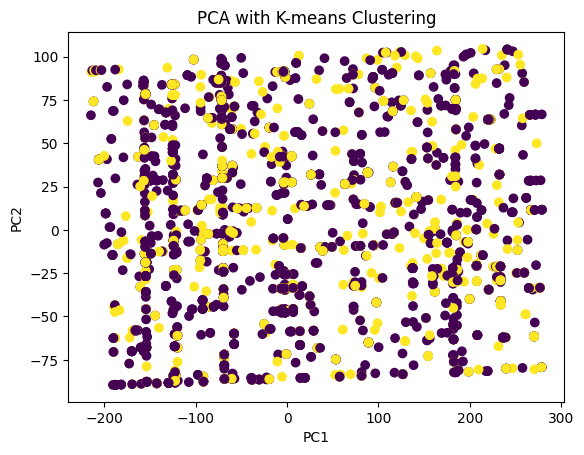

In [ ]:
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame with the cluster labels from K-means

# Extract the features from the DataFrame
features = result_df.drop('cluster', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = result_df['cluster']

# Visualize the PCA results with cluster labels
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with K-means Clustering')
plt.show()


The problem of interference between culsters is surely do to the inertia loss caused by the PCA

The problem of interference between th

## Utilisation de DBSCAN pour le clustering

In [ ]:
from sklearn.cluster import DBSCAN

eps = 5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

dbscan.fit(result_df)

dbscan_labels = dbscan.labels_

In [ ]:
dbscan_labels

array([-1, -1, -1, ..., -1, -1, -1])

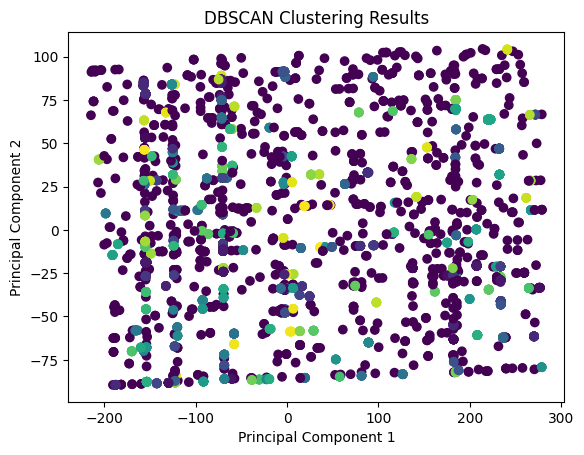

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Assuming 'data' is your dataframe

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(result_df)

# Apply DBSCAN clustering
eps = 1
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(reduced_data)

# Plot the data points with colors representing their cluster assignments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'kmeans_labels' contains the cluster labels assigned by K-means
silhouette_avg = silhouette_score(result_df, dbscan_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.00804335602468872


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Assuming 'data' is your dataframe

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(result_df)

# Define the parameter grid for hyperparameter tuning
param_grid = {'eps': np.linspace(0.1, 1.0, 10),
              'min_samples': [3, 5, 7, 10]}

# Perform grid search using silhouette score as the evaluation metric
grid_search = GridSearchCV(estimator=DBSCAN(), param_grid=param_grid, scoring='silhouette')
grid_search.fit(reduced_data)

# Get the best hyperparameters and corresponding model
best_eps = grid_search.best_params_['eps']
best_min_samples = grid_search.best_params_['min_samples']
best_model = grid_search.best_estimator_

# Apply DBSCAN clustering with the best hyperparameters
dbscan_labels = best_model.fit_predict(reduced_data)

# Calculate the silhouette score for the best model
silhouette = silhouette_score(reduced_data, dbscan_labels)
print(f"Best Silhouette Score: {silhouette}")

# Plot the data points with colors representing their cluster assignments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()